### Exploring Libraries

[Exploring Libraries.ipynb](https://colab.research.google.com/drive/1Km381IVB1qZ6-bVFgbzpT6o-uejDnAnZ?usp=sharing)

### Breadth First Search(BFS)

In [1]:
def bfs(graph, node):
    visited, queue = [node], [node]

    while queue:
        m = queue.pop(0)
        print(m, end=" ")

        for n in graph[m]:
            if n not in visited:
                visited.append(n)
                queue.append(n)

graph = {'A':['B','C'], 'B':['D','E'], 'C':['F'], 'D':[], 'E':['F'], 'F':[]}
bfs(graph, 'A')

A B C D E F 

### Depth First Search(DFS)

In [2]:
def dfs(graph, node, visited=None):
    if visited is None:
        visited = set()

    visited.add(node)
    print(node, end=" ")

    for n in graph[node]:
        if n not in visited:
            dfs(graph, n, visited)

# Graph using Lists to maintain order
graph = {'A':['B','C'], 'B':['D','E'], 'C':['F'], 'D':[], 'E':['F'], 'F':[]}
dfs(graph, 'A')

A B D E F C 

### Uniform Cost Search(UCS)

In [3]:
import heapq

def ucs(graph, start, goal):
    # Priority Queue stores tuples: (current_cost, path_taken)
    pq = [(0, [start])]
    visited = set()

    while pq:
        # Pop the path with the lowest cost first
        cost, path = heapq.heappop(pq)
        node = path[-1]

        if node == goal:
            return path, cost

        if node not in visited:
            visited.add(node)
            # Explore neighbors
            for n, step_cost in graph.get(node, []):
                if n not in visited:
                    heapq.heappush(pq, (cost + step_cost, path + [n]))

    return None, float("inf")

# Graph with edge weights: 'A': [['Neighbor', Cost], ...]
graph = {
    'A': [['B', 1], ['C', 2]],
    'B': [['D', 3], ['E', 4]],
    'C': [['F', 5]],
    'D': [], 'E': [['F', 6]], 'F': []
}

result_path, result_cost = ucs(graph, 'A', 'F')
print(f"Path: {result_path}, Cost: {result_cost}")

Path: ['A', 'C', 'F'], Cost: 7


### Depth Limited Search(DLS)

In [4]:
def dls(graph, node, goal, limit):
    if node == goal:
        return [node]

    if limit <= 0:
        return None

    for n in graph[node]:
        # Recursive call with reduced limit
        path = dls(graph, n, goal, limit - 1)
        if path:
            return [node] + path

    return None

graph = {'A':['B','C'], 'B':['D','E'], 'C':['F'], 'D':[], 'E':['F'], 'F':[]}
print(dls(graph, 'A', 'F', 2))

['A', 'C', 'F']


### NQueens

In [5]:
def solve_n_queens(n):
    cols, diag1, diag2 = set(), set(), set()
    solutions = []

    def is_safe(row, col):
        return (col not in cols and
                (row - col) not in diag1 and
                (row + col) not in diag2)

    def backtrack(row, path):
        if row == n:
            solutions.append(path)
            return

        for col in range(n):
            if is_safe(row, col):
                cols.add(col)
                diag1.add(row - col)
                diag2.add(row + col)
                backtrack(row + 1, path + [col])
                cols.remove(col)
                diag1.remove(row - col)
                diag2.remove(row + col)
    backtrack(0, [])

    for sol in solutions:
        for col in sol:
            print("." * col + "Q" + "." * (n - col - 1))
        print()

solve_n_queens(4)

.Q..
...Q
Q...
..Q.

..Q.
Q...
...Q
.Q..



### Minimax(Game Search)

In [6]:
import time, math

def minimax(depth, idx, isMax, scores, d):
    if depth == d: return scores[idx]
    left = minimax(depth+1, idx*2, not isMax, scores, d)
    right = minimax(depth+1, idx*2+1, not isMax, scores, d)
    return max(left, right) if isMax else min(left, right)

scores = [3, 5, 2, 9, 12, 5, 23, 23]
start = time.time()
print("Minimax:", minimax(0, 0, True, scores, 3))
print("Time:", time.time() - start, "seconds")

Minimax: 12
Time: 0.00019860267639160156 seconds


### Alpha Beta Pruning(Game Search)

In [7]:
import time, math

def alphabeta(depth, idx, isMax, scores, d, alpha, beta):
    if depth == d: return scores[idx]
    for i in range(2):
        val = alphabeta(depth+1, idx*2+i, not isMax, scores, d, alpha, beta)
        if isMax:
            alpha = max(alpha, val)
            if beta <= alpha: break
        else:
            beta = min(beta, val)
            if beta <= alpha: break
    return alpha if isMax else beta

scores = [3, 5, 2, 9, 12, 5, 23, 23]
start = time.time()
print("Alpha-Beta:", alphabeta(0, 0, True, scores, 3, float('-inf'), float('inf')))
print("Time:", time.time() - start, "seconds")

Alpha-Beta: 12
Time: 0.00032258033752441406 seconds


### Graph Coloring(CSP)

In [8]:
colors = ['Red', 'Green', 'Blue']
states = ['A', 'B', 'C', 'D']
adj = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}

def is_valid(state, color, assignment):
    for neighbor in adj[state]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

def backtrack(assignment):
    if len(assignment) == len(states):
        return assignment

    for state in states:
        if state not in assignment:
            var = state
            break

    for color in colors:
        if is_valid(var, color, assignment):
            assignment[var] = color
            result = backtrack(assignment)
            if result is not None:
                return result
            assignment.pop(var)

    return None

solution = backtrack({})
print("Solution:", solution)

Solution: {'A': 'Red', 'B': 'Green', 'C': 'Blue', 'D': 'Red'}


### Bayesian Networks(Burglary Alarm)

In [9]:
# Install the library if it's not already installed
!pip install pgmpy --quiet

from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

model = DiscreteBayesianNetwork([
    ('Burglary', 'Alarm'), ('Earthquake', 'Alarm'),
    ('Alarm', 'JohnCall'), ('Alarm', 'MaryCall')
])

model.add_cpds(
    TabularCPD('Burglary', 2, [[0.99], [0.01]]),
    TabularCPD('Earthquake', 2, [[0.98], [0.02]]),
    TabularCPD('Alarm', 2, [[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]],
               ['Burglary', 'Earthquake'], [2, 2]),
    TabularCPD('JohnCall', 2, [[0.95, 0.10], [0.05, 0.90]], ['Alarm'], [2]),
    TabularCPD('MaryCall', 2, [[0.99, 0.30], [0.01, 0.70]], ['Alarm'], [2])
)

inference = VariableElimination(model)
print(inference.query(['Alarm'], evidence={'Burglary': 1, 'Earthquake': 0}))

+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.0600 |
+----------+--------------+
| Alarm(1) |       0.9400 |
+----------+--------------+


### Hidden Markov Model(HMM)

Log probability: -6.360602626270058
Hidden states: [0 1 1 1 0 0]


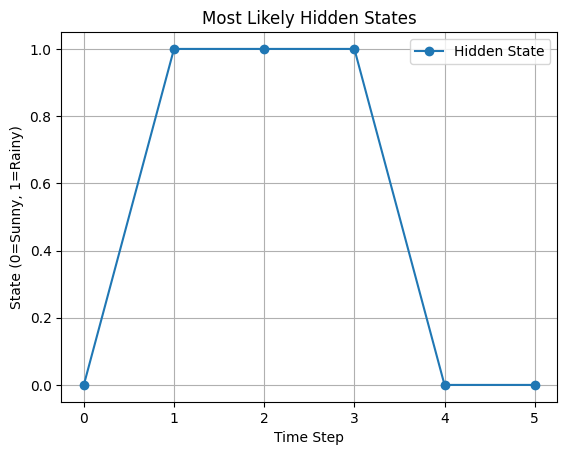

In [10]:
# Install the library if it's not already installed
!pip install hmmlearn --quiet

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Define model
model = hmm.CategoricalHMM(n_components=2)
model.startprob_ = [0.6, 0.4]
model.transmat_ = [[0.7, 0.3], [0.3, 0.7]]
model.emissionprob_ = [[0.9, 0.1], [0.2, 0.8]]

# Observations: 0=Dry, 1=Wet
obs = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)

# Decode hidden states
logp, states = model.decode(obs, algorithm="viterbi")
print("Log probability:", logp)
print("Hidden states:", states)

# Plot
plt.plot(states, '-o', label="Hidden State")
plt.xticks(range(len(obs)))
plt.xlabel("Time Step")
plt.ylabel("State (0=Sunny, 1=Rainy)")
plt.title("Most Likely Hidden States")
plt.legend()
plt.grid(True)
plt.show()

### Water Jug Problem

In [11]:
from collections import deque

def water_jug_bfs(cap1, cap2, target):
    # State representation: (jug1, jug2, path_of_actions)
    queue = deque([(0, 0, [])])
    visited = set()

    while queue:
        j1, j2, path = queue.popleft()

        # 1. Goal Test
        if j1 == target or j2 == target:
            return path

        # 2. Add current state to visited
        if (j1, j2) in visited:
            continue
        visited.add((j1, j2))

        # 3. Generate all 6 possible next moves
        next_states = [
            (cap1, j2, "Fill J1"),
            (j1, cap2, "Fill J2"),
            (0,    j2, "Empty J1"),
            (j1,   0,  "Empty J2"),
            # Pour J1 -> J2 (Amount is min of J1 or space left in J2)
            (j1 - min(j1, cap2 - j2), j2 + min(j1, cap2 - j2), "Pour J1->J2"),
            # Pour J2 -> J1 (Amount is min of J2 or space left in J1)
            (j1 + min(j2, cap1 - j1), j2 - min(j2, cap1 - j1), "Pour J2->J1")
        ]

        # 4. Add next moves to queue ONLY if not visited yet
        for n_j1, n_j2, action in next_states:
            if (n_j1, n_j2) not in visited:
                queue.append((n_j1, n_j2, path + [action]))

    return "No solution found"

# Driver Code
result = water_jug_bfs(5, 3, 2)
for step in result:
    print(step)

Fill J1
Pour J1->J2


### Water Jug Problem using A*

In [12]:
import heapq

# Heuristic: how far any jug is from target
def heuristic(x, y, target):
    return min(abs(x - target), abs(y - target))

# Generate all possible next states
def get_successors(x, y, jug1, jug2):
    successors = []
    successors.append((jug1, y, 'fill x'))          # Fill jug X
    successors.append((x, jug2, 'fill y'))          # Fill jug Y
    successors.append((0, y, 'empty x'))            # Empty jug X
    successors.append((x, 0, 'empty y'))            # Empty jug Y

    # Pour X → Y
    pour = min(x, jug2 - y)
    successors.append((x - pour, y + pour, 'pour x to y'))

    # Pour Y → X
    pour = min(y, jug1 - x)
    successors.append((x + pour, y - pour, 'pour y to x'))

    return successors

# A* search for water jug problem
def astar(jug1, jug2, target):
    heap = []
    visited = set()
    start_state = (0, 0, [], 0)       # (x, y, path, g_cost)
    heapq.heappush(heap, (heuristic(0, 0, target), start_state))

    while heap:
        f_cost, (x, y, path, g_cost) = heapq.heappop(heap)

        if (x, y) in visited:
            continue
        visited.add((x, y))

        if x == target or y == target:
            print("Goal state:", x, y)
            return path

        for nx, ny, action in get_successors(x, y, jug1, jug2):
            if (nx, ny) not in visited:
                new_path = path + [action]
                new_g = g_cost + 1
                h = heuristic(nx, ny, target)
                heapq.heappush(heap, (new_g + h, (nx, ny, new_path, new_g)))

    return "No solution"

# Driver code
jug1 = 3
jug2 = 4
target = 2
solution = astar(jug1, jug2, target)
print("Solution steps:", solution)

Goal state: 2 4
Solution steps: ['fill x', 'pour x to y', 'fill x', 'pour x to y']


### N-Puzzle Solver

In [13]:
import heapq

# 1. Manhattan Heuristic
def manhattan(curr_state, goal_state, size):
    return sum(
        abs(curr_state.index(tile)//size - goal_state.index(tile)//size) +
        abs(curr_state.index(tile)%size - goal_state.index(tile)%size)
        for tile in curr_state if tile
    )

# 2. Generate Neighbor States
def get_neighbors(state, size):
    zero_pos = state.index(0)
    row, col = divmod(zero_pos, size)

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    neighbors = []

    for dr, dc in directions:
        nr, nc = row + dr, col + dc
        if 0 <= nr < size and 0 <= nc < size:
            swap_pos = nr * size + nc
            new_state = list(state)
            new_state[zero_pos], new_state[swap_pos] = new_state[swap_pos], new_state[zero_pos]
            neighbors.append(tuple(new_state))

    return neighbors

# 3. A* Solver
def solve(start_state, goal_state, size):
    # priority queue: (f_score, g_score, state, path)
    pq = [(manhattan(start_state, goal_state, size), 0, start_state, [start_state])]
    visited = set()

    while pq:
        f_score, g_score, curr, path = heapq.heappop(pq)

        if curr == goal_state:
            return path

        if curr not in visited:
            visited.add(curr)

            for next_state in get_neighbors(curr, size):
                new_path = path + [next_state]
                new_g = g_score + 1
                new_f = new_g + manhattan(next_state, goal_state, size)
                heapq.heappush(pq, (new_f, new_g, next_state, new_path))

    return None

# Driver Code
if __name__ == "__main__":
    size = 3

    start_state = (
        1, 2, 3,
        4, 0, 6,
        7, 5, 8
    )

    goal_state = (
        1, 2, 3,
        4, 5, 6,
        7, 8, 0
    )

    result_path = solve(start_state, goal_state, size)

    if result_path:
        print(f"Solved in {len(result_path)-1} moves:\n")
        for step_num, state in enumerate(result_path):
            print(f"Step {step_num}:")
            for i in range(0, size*size, size):
                print(state[i:i+size])
            print()
    else:
        print("No solution found.")

Solved in 2 moves:

Step 0:
(1, 2, 3)
(4, 0, 6)
(7, 5, 8)

Step 1:
(1, 2, 3)
(4, 5, 6)
(7, 0, 8)

Step 2:
(1, 2, 3)
(4, 5, 6)
(7, 8, 0)

